In [2]:
import xarray as xr
import wavenumber_frequency_functions as wf 
import numpy as np
import matplotlib.pyplot as plt
import os 

ds = xr.open_dataset(os.path.expandvars("$SCRATCH/ERA5_OLR/olr_mean.grib"),engine='cfgrib')
ds = ds.stack(valid_time=('time','step'))
ds = ds.reset_index('valid_time')
ds['valid_time'] = ds['time'] + ds['step']
ds= ds.drop_vars(['time','step'])
ds = ds.set_index({'valid_time':'valid_time'})
ds

DEBUG:cfgrib.dataset:missing from GRIB stream: 'directionNumber'
DEBUG:cfgrib.dataset:missing from GRIB stream: 'frequencyNumber'
DEBUG:cfgrib.dataset:cache hit for ('4c62d6ad208645b08accb7310cac176c', ('parameter', 'time', 'geography', 'vertical')); using cached geometry
DEBUG:cfgrib.dataset:missing from GRIB stream: 'directionNumber'
DEBUG:cfgrib.dataset:missing from GRIB stream: 'frequencyNumber'
DEBUG:cfgrib.dataset:cache hit for ('4c62d6ad208645b08accb7310cac176c', ('parameter', 'time', 'geography', 'vertical')); using cached geometry


<xarray.Dataset> Size: 4GB
Dimensions:     (latitude: 121, longitude: 1440, valid_time: 2920)
Coordinates:
    number      int64 8B ...
    surface     float64 8B ...
  * latitude    (latitude) float64 968B 15.0 14.75 14.5 ... -14.5 -14.75 -15.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * valid_time  (valid_time) datetime64[ns] 23kB 2022-01-01 ... 2023-12-31T18...
Data variables:
    mtnlwrf     (latitude, longitude, valid_time) float32 2GB -306.4 ... -192.5
    mtpr        (latitude, longitude, valid_time) float32 2GB 0.0 ... 0.0003593
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-18T16:32 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
olr = - ds.mtnlwrf
olr = olr.rename({'latitude':'lat','longitude':'lon','valid_time':'time'})

In [7]:
olr = olr.transpose("time","lat","lon")
olr = olr.sel(time=slice('2022-06-31'))
olr

<xarray.DataArray 'mtnlwrf' (time: 360, lat: 121, lon: 1440)> Size: 251MB
array([[[306.4358  , 304.48267 , 303.20532 , ..., 312.97876 ,
         311.72876 , 309.23657 ],
        [308.16626 , 306.22095 , 304.6936  , ..., 313.46313 ,
         312.90845 , 310.71313 ],
        [308.83813 , 307.48267 , 306.08032 , ..., 312.6975  ,
         312.72876 , 310.95142 ],
        ...,
        [171.79517 , 178.61938 , 192.89282 , ..., 216.7561  ,
         207.1311  , 187.22876 ],
        [171.6272  , 172.60767 , 177.45923 , ..., 191.40063 ,
         186.83813 , 178.37329 ],
        [171.72095 , 168.5686  , 164.74048 , ..., 161.71313 ,
         162.48657 , 168.35767 ]],

       [[307.5066  , 306.09253 , 304.6941  , ..., 308.1316  ,
         308.2019  , 308.0769  ],
        [309.4519  , 308.3269  , 307.15503 , ..., 308.90503 ,
         309.5066  , 309.70972 ],
        [310.9519  , 310.14722 , 309.24097 , ..., 309.65503 ,
         310.68628 , 311.03784 ],
...
        [128.73804 , 146.41772 , 163.50366 , ..., 108.73804 ,
         115.198975, 121.0271  ],
        [123.81616 , 142.22241 , 159.94116 , ..., 105.73804 ,
         111.6521  , 116.70679 ],
        [123.14429 , 139.56616 , 154.97241 , ..., 104.198975,
         109.86304 , 115.5896  ]],

       [[273.66406 , 263.14062 , 254.70312 , ..., 290.10938 ,
         286.3828  , 280.65625 ],
        [269.73438 , 263.6172  , 259.14062 , ..., 288.89062 ,
         283.73438 , 276.8203  ],
        [266.39844 , 265.85938 , 266.375   , ..., 287.27344 ,
         281.      , 273.15625 ],
        ...,
        [105.46875 , 108.19531 , 112.75    , ..., 103.875   ,
         102.25781 , 102.96875 ],
        [111.03906 , 113.13281 , 116.32031 , ..., 104.67969 ,
         104.88281 , 107.390625],
        [115.82031 , 118.08594 , 120.59375 , ..., 105.046875,
         106.94531 , 111.28125 ]]], dtype=float32)
Coordinates:
    number   int64 8B ...
    surface  float64 8B ...
  * lat      (lat) float64 968B 15.0 14.75 14.5 14.25 ... -14.5 -14.75 -15.0
  * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * time     (time) datetime64[ns] 3kB 2022-01-01 ... 2022-03-31T18:00:00
Attributes: (12/31)
    GRIB_paramId:                             235040
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      174240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avg
    ...                                       ...
    GRIB_shortName:                           mtnlwrf
    GRIB_totalNumber:                         0
    GRIB_units:                               W m**-2
    long_name:                                Mean top net long-wave radiatio...
    units:                                    W m**-2
    standard_name:                            unknown

In [9]:
import wavenumber_frequency_functions as wf 

olr_power = wf.spacetime_power(olr,segsize=90,spd=4,noverlap=60*4, dosymmetries=True,rmvLowFrq=False)
olr_power_avg = olr_power.mean(dim='component')

olr_power.loc[{'frequency':0}] = np.nan # remove power at zero, we detrended so this signal should be removed

background = wf.smooth_wavefreq(olr_power_avg,kern=wf.simple_smooth_kernel(),nsmooth=50,freq_name='frequency')


olr_power_sym = olr_power.isel(component=0)
olr_power_asym = olr_power.isel(component=1)

wk_sym = olr_power_sym/background
wk_asym = olr_power_asym/background

DEBUG:root:[spacetime_power] data shape after removing low frequencies: (360, 121, 1440)
DEBUG:root:[spacetime_power] variance of data before windowing: 16244.1650390625
DEBUG:root:[spacetime_power] x_win shape is (1, 121, 1440, 360)
INFO:root:No missing, so use simplest segment detrend.
DEBUG:root:[spacetime_power] x_win variance of segments: [614.8836]
DEBUG:root:[spacetime_power] x_wintap variance of segments: [573.9812938]
DEBUG:root:[Hayashi] nDayWin: 90, spd: 4
INFO:root:[Hayashi] input dims is ('time', 'lat', 'wavenumber', 'frequency'), (1, 121, 1440, 360) || Input dtype: varfft.dtype = dtype('complex128')
INFO:root:[Hayashi] input coords is Coordinates:
  * time        (time) datetime64[ns] 8B 2022-03-31T18:00:00
  * lat         (lat) float64 968B 15.0 14.75 14.5 14.25 ... -14.5 -14.75 -15.0
  * wavenumber  (wavenumber) float64 12kB 0.0 1.0 2.0 3.0 ... -3.0 -2.0 -1.0
  * frequency   (frequency) float64 3kB 0.0 0.01111 ... -0.02222 -0.01111
DEBUG:root:[Hayashi] wavenumber axis i

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/users/robcking/experiments/error_sat/env/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/users/robcking/experiments/error_sat/env/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/users/robcking/experiments/error_sat/env/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/users/robcking/experiments/error_sat/env/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/users/robcking/experiments/error_sat/env/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, st

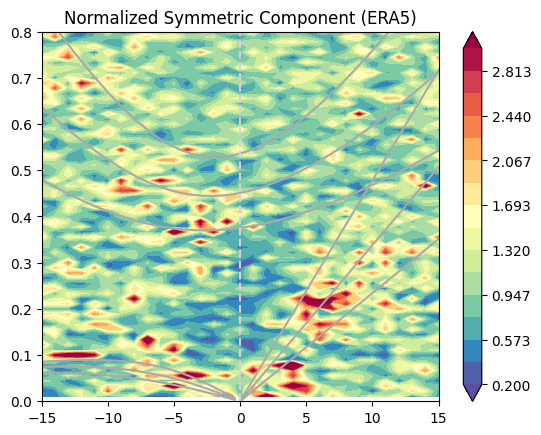

In [10]:
frequency_bounds = [0.,0.8]
swfreq,swwn = wf.genDispersionCurves()
swf = np.where(swfreq == 1e20, np.nan, swfreq)
swk = np.where(swwn == 1e20, np.nan, swwn)



fig, ax = plt.subplots()
c = 'darkgray' # COLOR FOR DISPERSION LINES/LABELS
z = wk_sym.transpose().sel(frequency=slice(*frequency_bounds), wavenumber=slice(-15,15))
z.loc[{'frequency':0}] = np.nan
kmesh0, vmesh0 = np.meshgrid(z['wavenumber'], z['frequency'])
img = ax.contourf(kmesh0, vmesh0, z, levels=np.linspace(0.2, 3.0, 16), cmap='Spectral_r',  extend='both')
for ii in range(3,6):
    ax.plot(swk[ii, 0,:], swf[ii,0,:], color=c)
    ax.plot(swk[ii, 1,:], swf[ii,1,:], color=c)
    ax.plot(swk[ii, 2,:], swf[ii,2,:], color=c)
ax.axvline(0, linestyle='dashed', color='lightgray')
ax.set_xlim([-15,15])
ax.set_ylim(frequency_bounds)    
ax.set_title("Normalized Symmetric Component (ERA5)")
fig.colorbar(img)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f3c9786fe30>


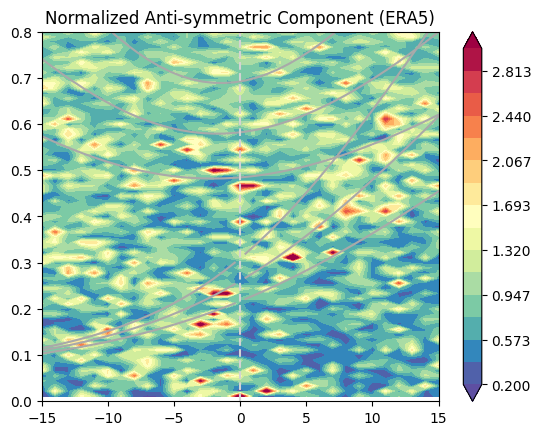

In [12]:
fb = [0, .8]  # frequency bounds for plot
# get data for dispersion curves:
swfreq,swwn = wf.genDispersionCurves()
# swfreq.shape # -->(6, 3, 50)
swf = np.where(swfreq == 1e20, np.nan, swfreq)
swk = np.where(swwn == 1e20, np.nan, swwn)


fig, ax = plt.subplots()
c = 'darkgray' # COLOR FOR DISPERSION LINES/LABELS
z = wk_asym.transpose().sel(frequency=slice(*fb), wavenumber=slice(-15,15))
z.loc[{'frequency':0}] = np.nan
kmesh0, vmesh0 = np.meshgrid(z['wavenumber'], z['frequency'])
img = ax.contourf(kmesh0, vmesh0, z, levels=np.linspace(0.2, 3.0, 16), cmap='Spectral_r', extend='both')
for ii in range(0,3):
    ax.plot(swk[ii, 0,:], swf[ii,0,:], color=c)
    ax.plot(swk[ii, 1,:], swf[ii,1,:], color=c)
    ax.plot(swk[ii, 2,:], swf[ii,2,:], color=c)
ax.axvline(0, linestyle='dashed', color='lightgray')
ax.set_xlim([-15,15])
ax.set_ylim(fb)
ax.set_title("Normalized Anti-symmetric Component (ERA5)")
fig.colorbar(img)

### alt methodology

In [13]:
from scipy.signal import detrend
olr_values = olr.values


## Important Values
Nt,Nx = olr_values[:,0,:].shape
nyquist = 2.0 # 4 samples per day /2 
dt = 0.25 
## Calculate Symmetric and A-Symmetric parts
olr_sym = (olr_values[:,:,:] + olr_values[:,::-1,:])/2
olr_asym =  (olr_values[:,:,:] - olr_values[:,::-1,:])/2
# Detrend and remove mean 
olr_sym = detrend(olr_sym,axis=0,type='linear') 
olr_asym = detrend(olr_asym,axis=0,type='linear')

## Re order axeses to be (lat, lon, time) 
olr_sym = np.transpose(olr_sym,(1,2,0))
olr_asym = np.transpose(olr_asym,(1,2,0))

## Calculate FFT normalized by number of bins, following NCL implementation 
## FFT2 calculates on the last two axes of the arrays so lon x time 
olr_power_sym = np.fft.fft2(olr_sym)/(Nt*Nx)
olr_power_asym = np.fft.fft2(olr_asym)/(Nt*Nx)
print(olr_power_sym.shape)
# APPARENTLY NEED TO REORDER (Hayashi Correction)
def hayashi_correction(fft_arr,n_k,n_omega,nqyuist):
    fs = 1/dt
    shape = list(fft_arr.shape)
    shape[-2] += 1
    shape[-1] += 1
    spacetime = np.full(shape,np.nan,dtype=fft_arr.dtype)
    ## Re-order quadarants
    spacetime[...,0:n_k//2, 0:n_omega//2] = fft_arr[...,n_k//2:0:-1,n_omega//2:]
    spacetime[...,0:n_k//2, n_omega//2:]  = fft_arr[...,n_k//2:0:-1,0:(n_omega//2)+1]
    spacetime[...,n_k//2:, 0:n_omega//2+1] = fft_arr[...,0:n_k//2+1, n_omega//2::-1]
    spacetime[...,n_k//2:, n_omega//2+1:] = fft_arr[...,0:n_k//2+1,-1:n_omega//2-1:-1]

    spacetime[...,:,(n_omega + 1)//2] = np.nan

    psd = np.abs(spacetime)**2

    new_wavenumbers = np.arange(-n_k//2,(n_k//2) + 1, 1,dtype=int) 
    new_omegas = np.linspace(-nyquist,nyquist, n_omega + 1)

    return psd, new_wavenumbers, new_omegas
    

olr_power_sym, ks, omegas = hayashi_correction(olr_power_sym,Nx,Nt,nyquist)
olr_power_asym, _,_ = hayashi_correction(olr_power_asym,Nx,Nt,nyquist)

## Sum over all latitudes 
olr_power_sym = np.sum(olr_power_sym,axis=0)
olr_power_asym =np.sum(olr_power_asym,axis=0)


(121, 1440, 360)


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f3c97314bc0>


(0.0, 0.8)

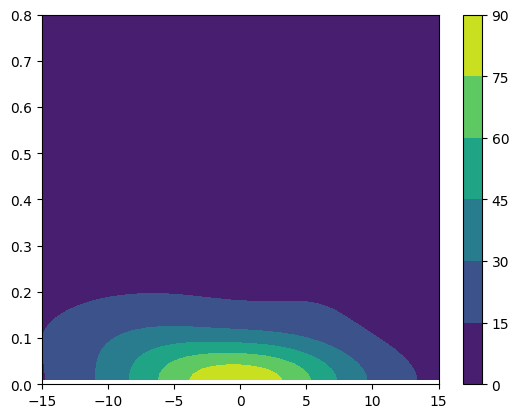

In [14]:
from scipy.signal import convolve2d

## Calculate background signal from average power spectra
avg_spec = (olr_power_sym + olr_power_asym)/2
## Simple Gaussian Kernel 
kernel = np.array([[0,1,0],[1,4,1],[0,1,0]])
kernel = kernel/kernel.sum()

id_freq = int((Nt + 1)//2)
background_rob = avg_spec
## Apply smoothing kernel many times (here I chose 50)
for i in range(50):
    arr1 = background_rob[:,:id_freq]
    arr2 = background_rob[:,id_freq+1:]
    cov1 = convolve2d(arr1,kernel,boundary='symm',mode='same')
    cov2 = convolve2d(arr2,kernel,boundary='symm',mode='same')

    background_rob[:,:id_freq] = cov1 
    background_rob[:,id_freq+1:] = cov2 

## Plot background OLR 
kmesh0, vmesh0 = np.meshgrid(ks,omegas)
plt.contourf(kmesh0,vmesh0,background_rob.T)
plt.xlim([-15,15])
plt.colorbar()
plt.ylim(frequency_bounds)    

In [15]:
wk_sym_rob = olr_power_sym/background_rob
wk_asym_rob = olr_power_asym/background_rob

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f3875f03170>


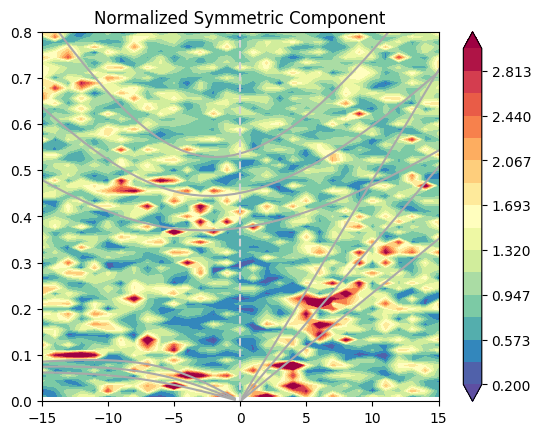

In [16]:
fig, ax = plt.subplots()
c = 'darkgray' # COLOR FOR DISPERSION LINES/LABELS
z = wk_sym_rob.T
# z.loc[{'frequency':0}] = np.nan
kmesh0, vmesh0 = np.meshgrid(ks,omegas)
img = ax.contourf(kmesh0, vmesh0, z, levels=np.linspace(0.2, 3.0, 16), cmap='Spectral_r',  extend='both')
for ii in range(3,6):
    ax.plot(swk[ii, 0,:], swf[ii,0,:], color=c)
    ax.plot(swk[ii, 1,:], swf[ii,1,:], color=c)
    ax.plot(swk[ii, 2,:], swf[ii,2,:], color=c)
ax.axvline(0, linestyle='dashed', color='lightgray')
ax.set_xlim([-15,15])
ax.set_ylim(frequency_bounds)    
ax.set_title("Normalized Symmetric Component")
fig.colorbar(img)



DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f3c971f69c0>


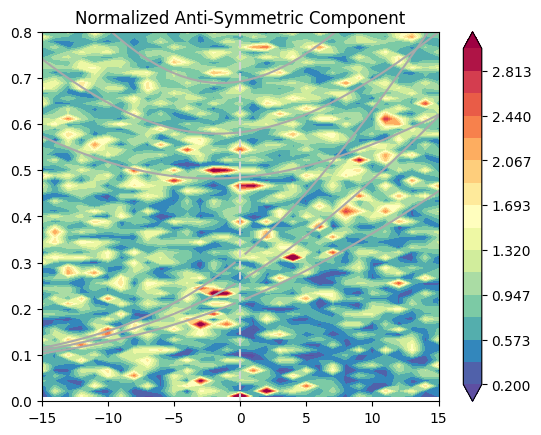

In [17]:
fig, ax = plt.subplots()
c = 'darkgray' # COLOR FOR DISPERSION LINES/LABELS
z = wk_asym_rob.T
# z.loc[{'frequency':0}] = np.nan
kmesh0, vmesh0 = np.meshgrid(ks,omegas)
img = ax.contourf(kmesh0, vmesh0, z, levels=np.linspace(0.2, 3.0, 16), cmap='Spectral_r',  extend='both')
for ii in range(0,3):
    ax.plot(swk[ii, 0,:], swf[ii,0,:], color=c)
    ax.plot(swk[ii, 1,:], swf[ii,1,:], color=c)
    ax.plot(swk[ii, 2,:], swf[ii,2,:], color=c)
ax.axvline(0, linestyle='dashed', color='lightgray')
ax.set_xlim([-15,15])
ax.set_ylim(frequency_bounds)    
ax.set_title("Normalized Anti-Symmetric Component")
fig.colorbar(img)